In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import tensorflow.keras 
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.datasets import cifar100


In [2]:
batch_size = 128
buffersize = 50000
steps_per_epoch = int(np.ceil(50000) / float(batch_size))
epochs = 200
num_classes = 100
validation_split = 0.2

(X_train_orig, Y_train), (X_test_orig, Y_test) = cifar100.load_data(label_mode="fine")

X_train = X_train_orig.astype(np.float32)/255
X_test = X_test_orig.astype(np.float32)/255

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [3]:
def Conv_Model(input_shape):
    Conv_Model = models.Sequential()
    Conv_Model.add(layers.Conv2D(512, (3,3), padding='same', input_shape = input_shape))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))

    Conv_Model.add(layers.MaxPooling2D((2,2)))

    Conv_Model.add(layers.Conv2D(128, (3,3), padding='same'))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))

    Conv_Model.add(layers.Conv2D(128, (5,5), (2,2), padding='same'))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))

    Conv_Model.add(layers.MaxPooling2D((2,2)))

    Conv_Model.add(layers.Conv2D(32, (7,7), (3,3), padding='same'))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))

    Conv_Model.add(layers.Conv2D(32, (12,12), padding='same'))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))
    
    Conv_Model.add(layers.Conv2D(32, (7,7), padding='same'))
    Conv_Model.add(layers.LeakyReLU())
    Conv_Model.add(layers.Dropout(0.3))

    Conv_Model.add(layers.MaxPooling2D((2,2)))

    Conv_Model.add(layers.Flatten())
    Conv_Model.add(layers.Dense(256, activation='relu'))
    Conv_Model.add(layers.Dense(100, activation='softmax'))

    return Conv_Model

In [4]:
Conv_Model = Conv_Model(X_train.shape[1:])
Conv_Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Conv_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 512)       14336     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 512)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       589952    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0

In [7]:
history = Conv_Model.fit(X_train, Y_train, batch_size= batch_size, epochs= epochs, verbose = 1, validation_split=validation_split)
Conv_Model.save("imgnet_v2_cnn_epo_" + str(epochs) + "_btchsz_" + str(batch_size) + ".h5")

Epoch 1/200
 48/313 [===>..........................] - ETA: 36s - loss: 4.5999 - accuracy: 0.0116

KeyboardInterrupt: 

313/313 [==============================] - 2s 6ms/step - loss: 2.4739 - accuracy: 0.3897
Test loss: 2.4739110469818115 / Test accuracy: 0.3896999955177307


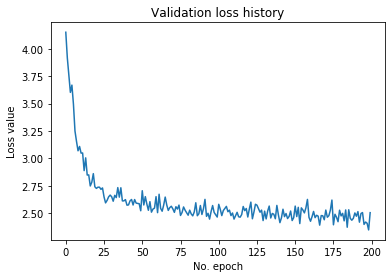

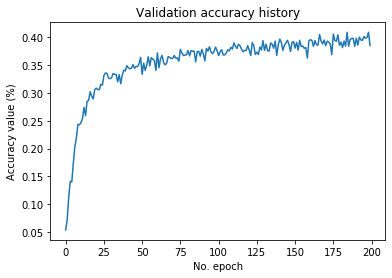

In [66]:
Conv_Model.save("justincase.h5")
score = Conv_Model.evaluate(X_test, Y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()